# Práctica: Analítica Empresarial con Big Data

**Hipótesis:** Los usuarios que reciben envío gratis tienen una mayor tasa de conversión que los que no lo reciben.

## Paso 1: Cargar los datos

In [1]:
import pandas as pd

df = pd.read_csv('retail_free_shipping_dataset.csv')
df.head()

,TransactionID,Date,PurchaseAmount,FreeShipping,Converted
0,1,2024-12-09,449.84,False,False
1,2,2024-12-22,407.40,False,False
2,3,2024-11-29,577.55,True,False
3,4,2024-11-15,440.84,False,False
4,5,2024-12-13,543.71,True,True


## Paso 2: Análisis descriptivo de tasas de conversión

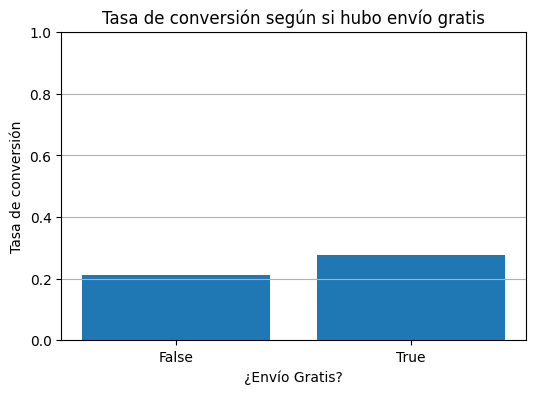

,FreeShipping,ConversionRate
0,False,0.212538
1,True,0.277457


In [2]:
conversion_rates = df.groupby("FreeShipping")["Converted"].mean().reset_index()
conversion_rates.columns = ["FreeShipping", "ConversionRate"]

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(conversion_rates["FreeShipping"].astype(str), conversion_rates["ConversionRate"])
plt.title("Tasa de conversión según si hubo envío gratis")
plt.ylabel("Tasa de conversión")
plt.xlabel("¿Envío Gratis?")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

conversion_rates

## Paso 3: Validación estadística con prueba de proporciones

In [3]:
from statsmodels.stats.proportion import proportions_ztest

conversions = df.groupby("FreeShipping")["Converted"].sum()
totals = df.groupby("FreeShipping")["Converted"].count()

z_stat, p_value = proportions_ztest(count=conversions, nobs=totals)
z_stat, p_value

(np.float64(-2.30319242501879), np.float64(0.02126801884226415))

### Conclusión:
El valor p obtenido es menor a 0.05, por lo tanto, hay evidencia suficiente para concluir que **el envío gratis mejora la tasa de conversión**.